In [145]:
unzip_path = "./dataset/"

In [146]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os
import pandas as pd

# data_url = "https://dshare.mathematik.uni-marburg.de/index.php/s/GrPtczNmDZQcn9f/download/training_dataset.zip"

# with urlopen(data_url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#         zfile.extractall(unzip_path)

print('Dataset extracted to "{:s}"'.format(os.path.realpath(unzip_path)))
df = pd.read_csv('dataset/train.csv', index_col='Id')
df.head(5)

Dataset extracted to "/Users/williamhutchinson/Local_Docs/SEM1_Coding/ML_Hackathon/ml_hackathon/dataset"


,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,3JahreszeitenVerandaflaeche,AbgeschirmteVerandaflaeche,Poolflaeche,Poolqualitaet,Zaunqualitaet,Garagentyp,Garagenbaujahr,Garageninnenausbau,Garagenautos,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,3,EGWA,918.54,Reg,Ebn,San,Eck,22.2,Pfla,NaN,Platten,Kein,0.0,ZiegAlg,ZiegAll,Flach,KiesTeer,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,84.96,84.96,0.00,0.0,4,Ger1,1,0,2,1,Ar,0,NaN,GasWD,Ar,N,SichAr,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,Abgetr,1966.0,NAu,2.0,47.52,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,5,EGWA,632.16,Reg,Ebn,San,Inn,18.0,Pfla,NaN,BetonGeg,Kein,0.0,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Ag,Gu,Ke,DWR,88.2,NAu,0.0,9.90,98.10,1.0,0.0,98.10,98.10,0.00,0.0,5,Typ,1,1,2,1,Du,0,NaN,GasWO,Gu,J,SLSRo,0.0,4.41,0.00,0.0,0.0,0.0,NaN,NaN,Verbund,2015.0,Aus,2.0,40.50,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,5,EGWA,1960.20,Reg,Ebn,San,Inn,19.8,Pfla,NaN,BetonGeg,Kein,0.0,Holz,HlzSch,Giebel,VerbSch,Du,Du,Ty,Ar,Ke,NAu,0.0,NAu,0.0,73.53,73.53,0.0,0.0,139.50,84.60,54.90,0.0,7,Ger2,1,1,3,1,Du,1,Du,GasWO,Gu,J,SichAr,0.0,0.00,38.61,0.0,0.0,0.0,NaN,MnPrv,Abgetr,1947.0,NAu,1.0,28.62,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,5,EGWA,868.41,UR1,Ebn,San,Inn,17.7,Pfla,NaN,BetonGeg,Kein,0.0,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Gu,Ty,Ke,NAu,0.0,NAu,0.0,84.69,84.69,0.0,0.0,147.96,86.49,61.47,0.0,7,Typ,2,1,3,1,Du,1,Du,GasWO,Ag,J,SLSRo,41.4,3.78,0.00,0.0,0.0,0.0,NaN,NaN,Verbund,2009.0,GAu,2.0,41.40,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,7,EGWA,1029.15,UR1,Hng,Mit,Eck,NaN,Pfla,NaN,BetonGeg,Kein,0.0,ZiegMau,Stuck,Giebel,VerbSch,Du,Du,Gu,Ty,Ke,NAu,0.0,NAu,0.0,71.28,71.28,0.0,0.0,136.53,71.28,65.25,0.0,7,Typ,1,0,3,1,Gu,2,Gu,GasWO,Ar,J,SLSRo,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,Abgetr,1941.0,NAu,2.0,36.00,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [147]:
features = df.columns[:-1]
features_20_1, features_20_2, features_20_3, features_19_4 = features[:20], features[20:40], features[40:60], features[60:]

df_20_1 = pd.concat([df[features_20_1], df['Verkaufspreis']], axis=1)
df_20_2 = pd.concat([df[features_20_2], df['Verkaufspreis']], axis=1)
df_20_3 = pd.concat([df[features_20_3], df['Verkaufspreis']], axis=1)
df_20_4 = pd.concat([df[features_19_4], df['Verkaufspreis']], axis=1)

In [148]:
pd.options.display.max_rows = 85
pd.options.display.max_columns = 85
df_20_3.describe(include='all')

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,1998,2000.000000,2000.000000,2000.000000,2000.000000,1999,2000.000000,1040,2000,2000,2000,1999,2000.000000,2000.000000,2000.000000,2000.00000
unique,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,4,NaN,5,5,5,2,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Typ,NaN,NaN,NaN,NaN,Du,NaN,Gu,GasWO,Ag,J,SLSRo,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1864,NaN,NaN,NaN,NaN,1034,NaN,527,1971,1024,1865,1827,NaN,NaN,NaN,NaN
mean,135.531945,104.294025,30.785310,0.45261,6.466000,NaN,1.572000,0.378000,2.867500,1.042500,NaN,0.603500,NaN,NaN,NaN,NaN,NaN,8.575200,4.269735,2.126205,153708.42060
std,46.068902,35.585721,38.841752,4.32349,1.558223,NaN,0.548604,0.498237,0.815645,0.204242,NaN,0.647686,NaN,NaN,NaN,NaN,NaN,11.506873,5.952831,6.010000,68822.30926
min,36.630000,36.630000,0.000000,0.00000,3.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,10870.65000
25%,101.767500,78.907500,0.000000,0.00000,5.000000,NaN,1.000000,0.000000,2.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,109650.00000
50%,129.645000,97.290000,0.000000,0.00000,6.000000,NaN,2.000000,0.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.430000,0.000000,136000.00000
75%,156.442500,124.380000,63.360000,0.00000,7.000000,NaN,2.000000,1.000000,3.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,15.120000,6.300000,0.000000,181475.00000


# Analyze William

## Oberirdirsche Wohnflaeche

OberirdischeWohnflaeche: Oberirdische Wohnfläche in Quadratmetern

1Stockflaeche: Größe des ersten Stocks in Quadratmetern

2Stockflaeche: Größe des zweiten Stocks in Quadratmetern

GeringequalitaetFlaeche: Größe ausgebauter Bereich in geringer Qualität in Quadratmetern (alle Stockwerke)

OberirdischeRaueme: Gesamtzahl der oberirdischen Räume (ohne Badezimmer)

Funktionalitaet: Wohnfunktionalität (Annahme typisch, sofern keine Abzüge gerechtfertigt sind)

       Typ	Typische Funktionalität
       Ger1	Geringfügige Abzüge 1
       Ger2	Geringfügige Abzüge 2
       Mit	Mittlere Abzüge
       Gro1	Große Abzüge 1
       Gro2	Große Abzüge 2
       Sch	Schwere Beschädigungen
       Ber	Nur Bergung

OberirdischeVollbadezimmer: Oberirdische vollständige Badezimmer

OberirdischeHalbbadezimmer: Oberirdische halbe Badezimmer

Schlafzimmer: Oberirdische Schlafzimmer (umfasst NICHT Schlafzimmer im Keller)

Kuechen: Oberirdische Küchen

KuechenQualitaet: Qualität der Küchen

       Ag	Ausgezeichnet
       Gu	Gut
       Du	Durchschnittlich/Typisch
       Ar	Ausreichend
       Sc	Schlecht

Kamine: Anzahl der Kamine

Kaminqualitaet: Qualität der Kamine

       Ag	Ausgezeichnet
       Gu	Gut
       Du	Durchschnittlich/Typisch
       Ar	Ausreichend
       Sc	Schlecht
       NA	Keine Kamine

Heizung: Art der Heizung

       BodOf	Fußbodenofen
       GasWO	Gasbefeuerter Warmluftofen
       GasWD	Gasbetriebene Warmwasser- oder Dampfheizung
       GravOf	Gravitationsofen
       NGasWD	Nicht Gasbetriebene Warmwasser- oder Dampfheizung
       WandOf	Wandofen

Heizungsqualitaet: Heizungsqualität und -zustand

       Ag	Ausgezeichnet
       Gu	Gut
       Du	Durchschnittlich/Typisch
       Ar	Ausreichend
       Sc	Schlecht

Klimalanlage: Zentrale Klimaanlage

       N	Nein
       J	Ja

Elektrik: Elektrische Anlage

       SLSRo	Standard-Leistungsschalter & Romex-Verkabelung
       SichDu	Sicherungskasten mit über 60 AMP und vollständige Romex-Verkabelung (Durchschnitt)
       SichAr	60 AMP-Sicherungskasten und überwiegend Romex-Verkabelung (Ausreichend)
       SichSc	60-AMP-Sicherungskasten und meist Knopf- und Röhrenverkabelung (schlecht)
       Mix		Gemischt

Holzdeckflaeche: Fläche des Holzdecks in Quadratmetern

OffeneVerandaflaeche: Offener Verandabereich in Quadratmetern

GeschlosseneVerandaflaeche: Geschlossener Verandabereich in Quadratmetern

## Feature Analysis

In [149]:
print("\nMissing Values:")
print(df_20_3.isnull().sum())

#Funktionalität: 2 NaN (mit Kaminqualitaet NaN)
#KuechenQualitaet: 1 NaN (mit Kaminqualitaet NaN)
#Kaminqualitaet: 960 NaN (womit korreliert?)
#Elektrik: 1 NaN (mit Kaminqualitaet NaN)


Missing Values:
OberirdischeWohnflaeche         0
1Stockflaeche                   0
2Stockflaeche                   0
GeringequalitaetFlaeche         0
OberirdischeRaueme              0
Funktionalitaet                 2
OberirdischeVollbadezimmer      0
OberirdischeHalbbadezimmer      0
Schlafzimmer                    0
Kuechen                         0
KuechenQualitaet                1
Kamine                          0
Kaminqualitaet                960
Heizung                         0
Heizungsqualitaet               0
Klimalanlage                    0
Elektrik                        1
Holzdeckflaeche                 0
OffeneVerandaflaeche            0
GeschlosseneVerandaflaeche      0
Verkaufspreis                   0
dtype: int64


In [150]:
# Find rows where multiple features are null
rows_with_nulls = df_20_3[df_20_3.isnull().sum(axis=1) > 1]

# Display only relevant columns for the rows with null values
relevant_columns = df_20_3.columns[df_20_3.isnull().any()]
print("Rows with null values in multiple features (relevant columns only):")
print(rows_with_nulls[relevant_columns])

Rows with null values in multiple features (relevant columns only):
     Funktionalitaet KuechenQualitaet Kaminqualitaet Elektrik
Id                                                           
542              NaN               Ar            NaN   SichDu
1001             NaN               Du            NaN    SLSRo
1144             Mit              NaN            NaN    SLSRo
1699             Typ               Gu            NaN      NaN


In [151]:
df_kamin = df_20_3[df_20_3['Kaminqualitaet'].isnull()]
selected_columns = ['Kamine','Kaminqualitaet']
print(df_kamin.loc[:,selected_columns])

      Kamine Kaminqualitaet
Id                         
1          0            NaN
2          0            NaN
7          0            NaN
10         0            NaN
14         0            NaN
...      ...            ...
1989       0            NaN
1994       0            NaN
1995       0            NaN
1996       0            NaN
1999       0            NaN

[960 rows x 2 columns]


In [152]:
# Find rows where multiple features are null
rows_with_nulls = df_20_3[(df_20_3['Kaminqualitaet'].isnull()) & (df_20_3.isnull().sum(axis=1) > 1)]

# Display only relevant columns for the rows with null values
relevant_columns = df_20_3.columns[df_20_3.isnull().any()]
print("Rows with null values in multiple features (relevant columns only):")
print(rows_with_nulls[relevant_columns])

Rows with null values in multiple features (relevant columns only):
     Funktionalitaet KuechenQualitaet Kaminqualitaet Elektrik
Id                                                           
542              NaN               Ar            NaN   SichDu
1001             NaN               Du            NaN    SLSRo
1144             Mit              NaN            NaN    SLSRo
1699             Typ               Gu            NaN      NaN


## Plotting of features

In [153]:
import matplotlib.pyplot as plt


def plot_feature(df, feature):
    plt.figure(figsize=(10, 5))
    plt.scatter(df[feature], df['Verkaufspreis'])
    plt.xlabel(feature)
    plt.ylabel('Verkaufspreis')
    plt.show()

In [154]:
def plot_all_features(df):
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.scatter(df[feature], df['Verkaufspreis'])
            plt.xlabel(feature)
            plt.ylabel('Verkaufspreis')
        except Exception as e:
            print(e)
    plt.show()

In [155]:
df_20_3[df_20_3["Heizung"] == "GasWO"].count()

OberirdischeWohnflaeche       1971
1Stockflaeche                 1971
2Stockflaeche                 1971
GeringequalitaetFlaeche       1971
OberirdischeRaueme            1971
Funktionalitaet               1970
OberirdischeVollbadezimmer    1971
OberirdischeHalbbadezimmer    1971
Schlafzimmer                  1971
Kuechen                       1971
KuechenQualitaet              1970
Kamine                        1971
Kaminqualitaet                1031
Heizung                       1971
Heizungsqualitaet             1971
Klimalanlage                  1971
Elektrik                      1970
Holzdeckflaeche               1971
OffeneVerandaflaeche          1971
GeschlosseneVerandaflaeche    1971
Verkaufspreis                 1971
dtype: int64

num must be an integer with 1 <= num <= 20, not 21


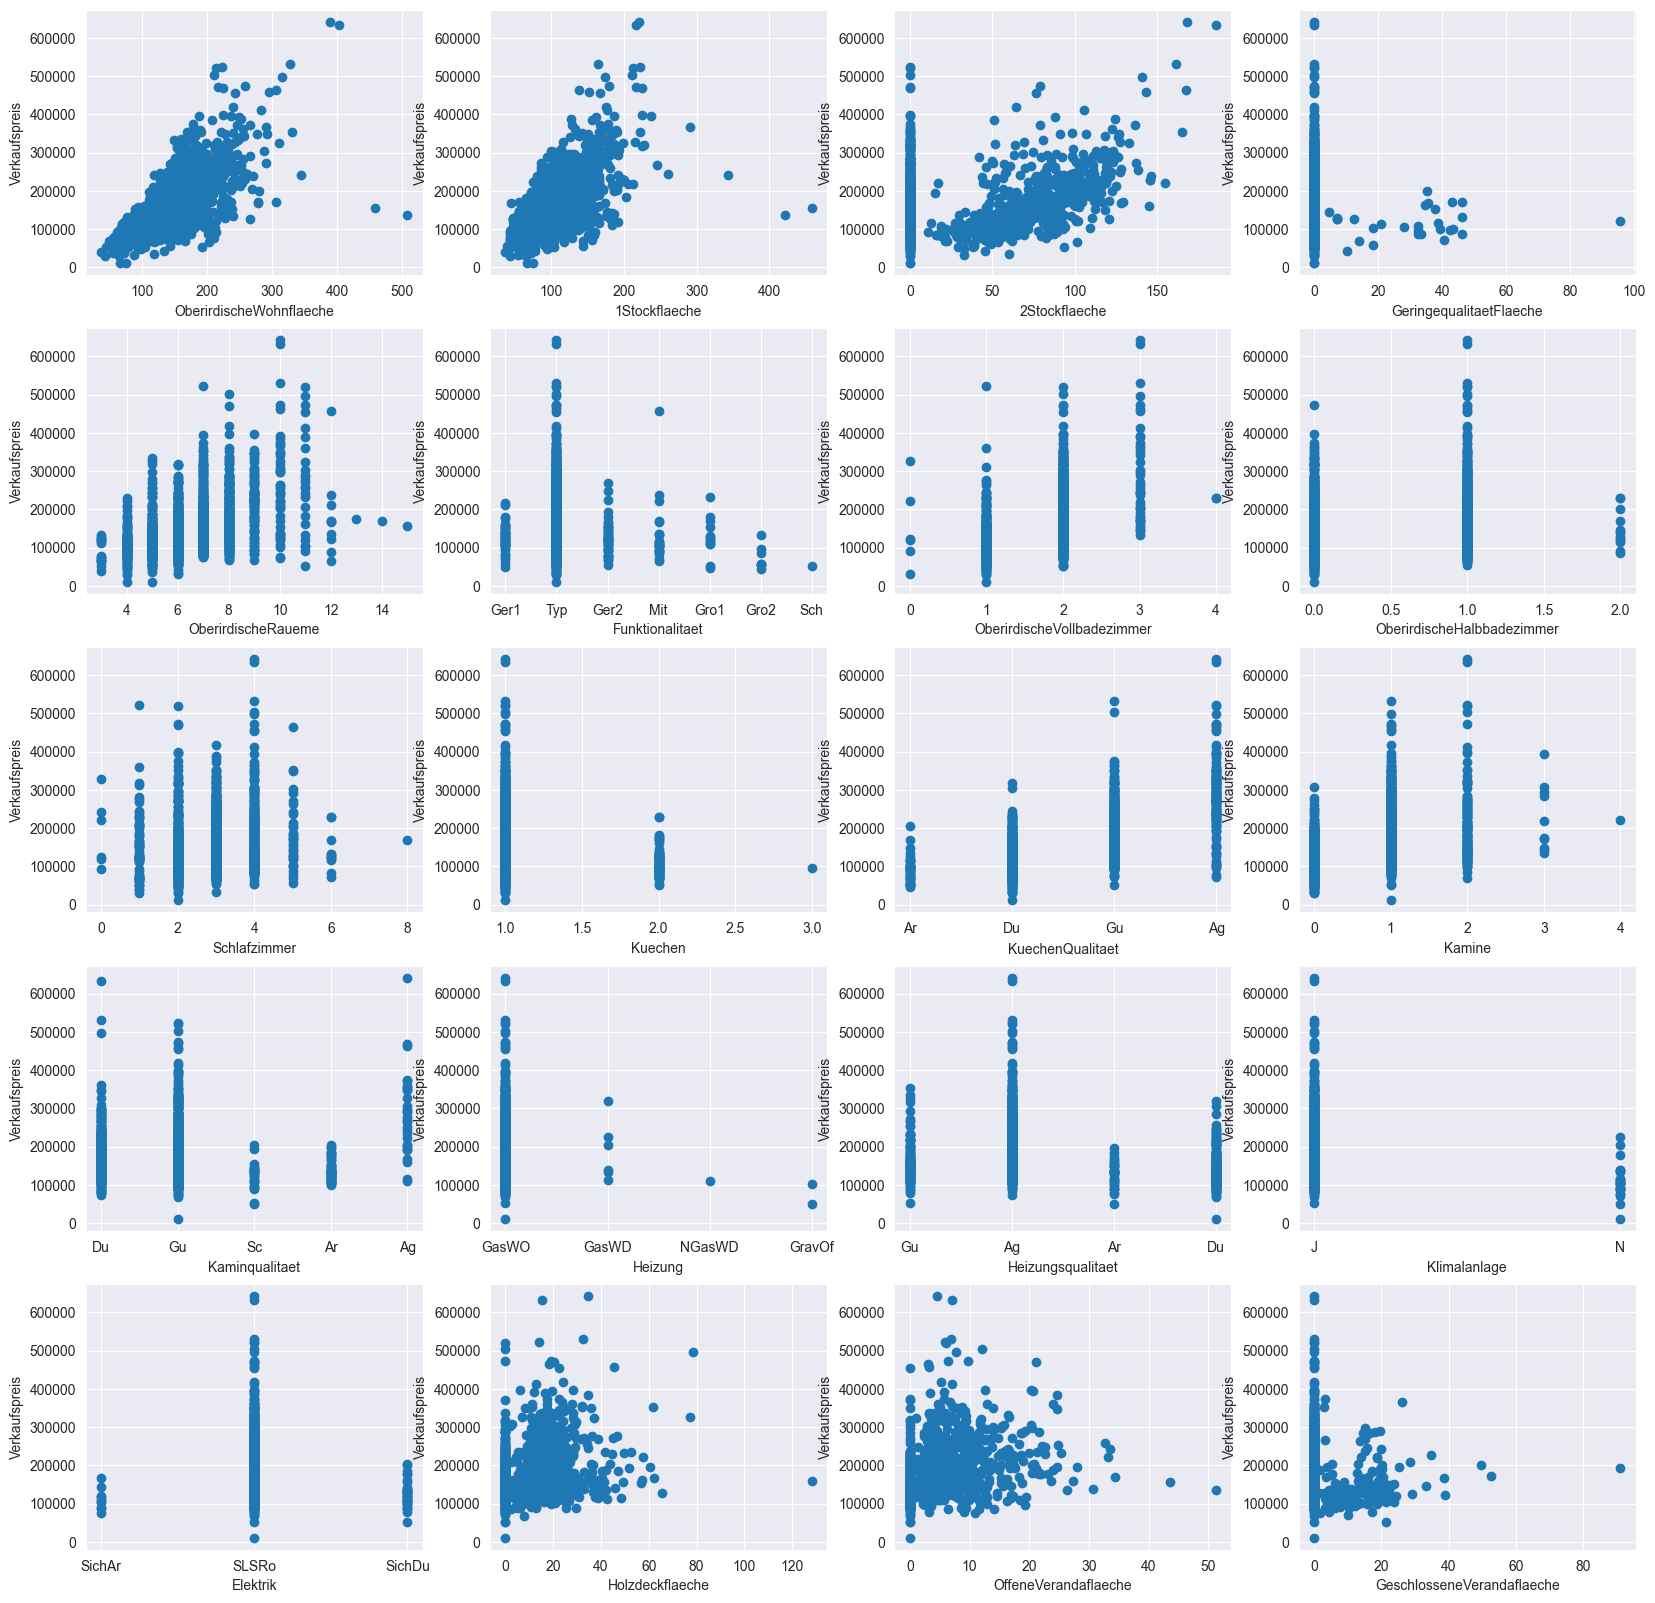

In [156]:
plot_all_features(df_20_3)

In [157]:
df_20_3[df_20_3['OberirdischeWohnflaeche'].isnull()]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,


In [158]:
def drawbox_all(df):
    plt.figure(figsize=(20, 20))
    # get only numeric features
    df = df.select_dtypes(include=['float64', 'int64'])
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.boxplot(df[feature])
            plt.xlabel(feature)
        except Exception as e:
            print(e)
    plt.show()


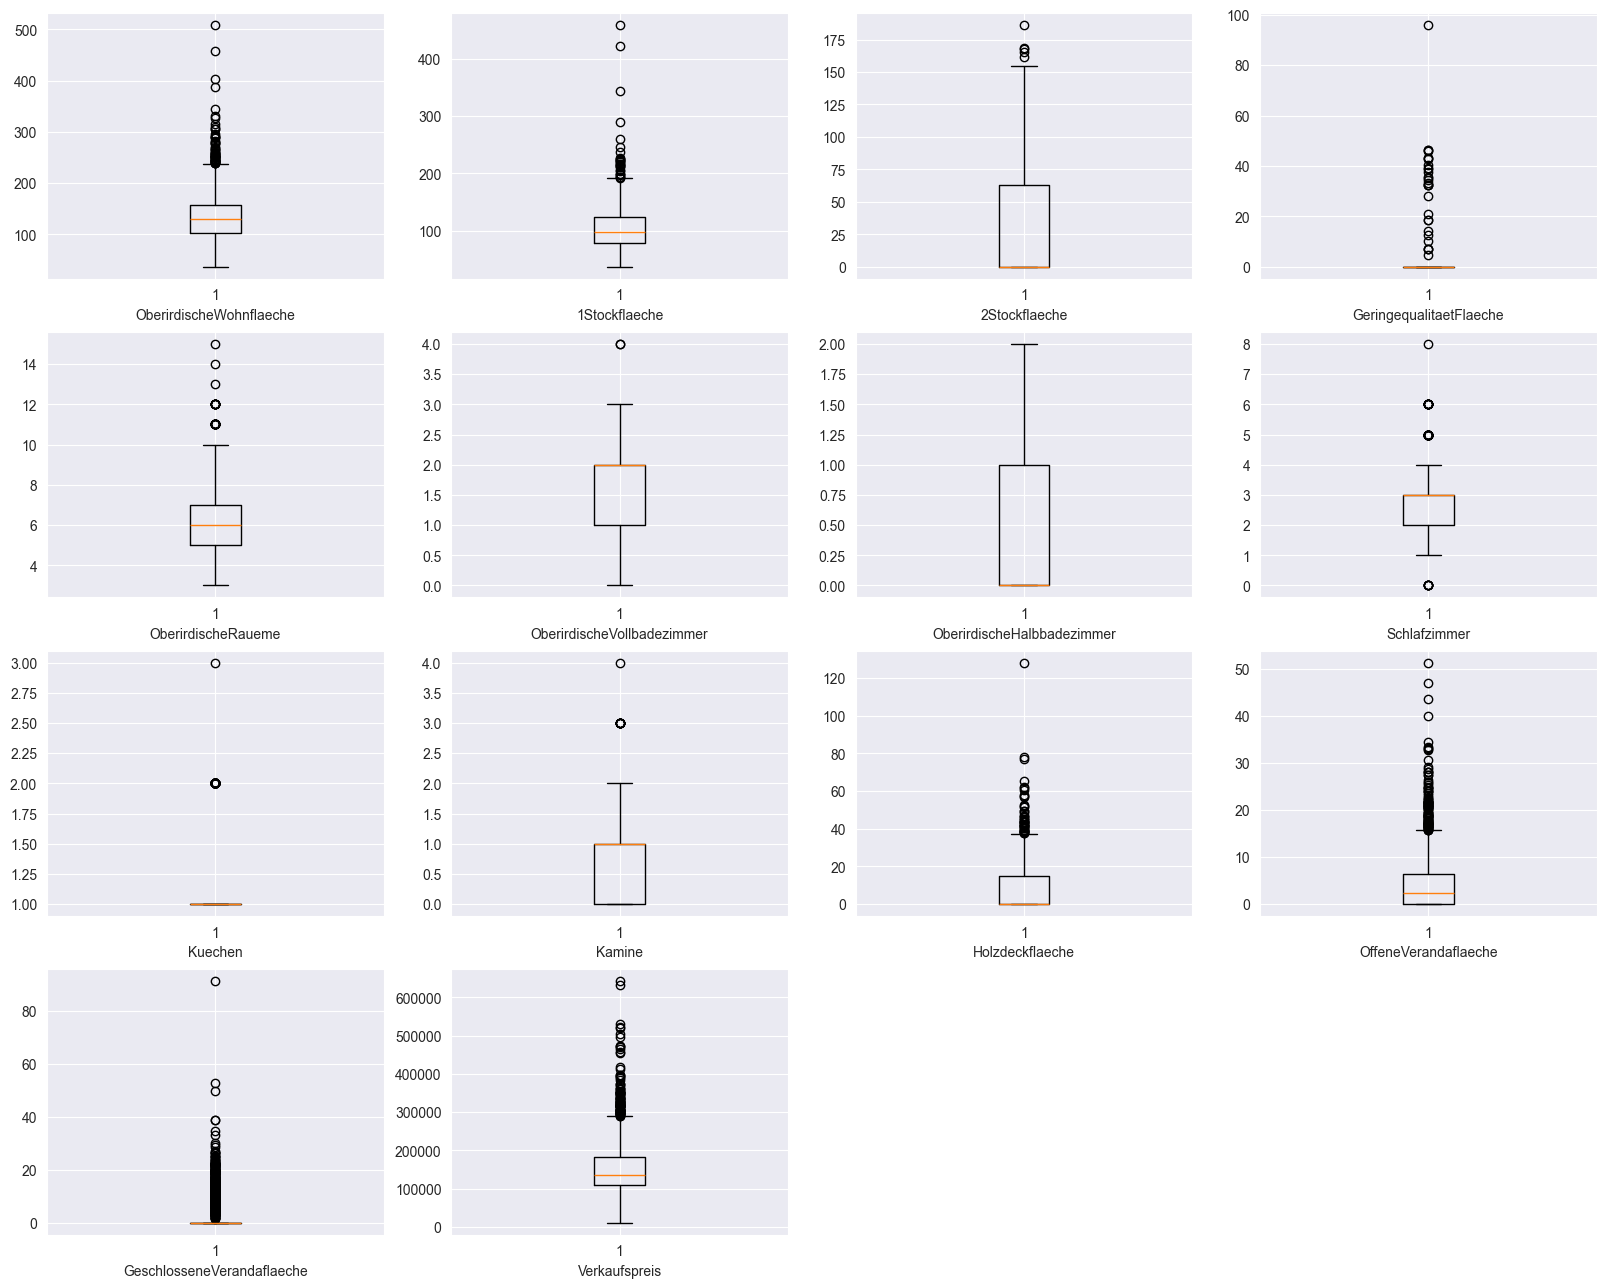

In [159]:
drawbox_all(df_20_3)

## Correlation of features

In [160]:
def calculate_correlation(df):
    df = df.select_dtypes(include=['float64', 'int64'])
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    return corr

In [161]:
calculate_correlation(df_20_3)

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,Kamine,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
OberirdischeWohnflaeche,1.000000,0.565485,0.656143,0.106391,0.804733,0.631628,0.439814,0.511008,0.105425,0.470407,0.277855,0.327014,0.003025,0.709304
1Stockflaeche,0.565485,1.000000,-0.244670,-0.007187,0.392793,0.355478,-0.093701,0.097086,0.057374,0.417018,0.242826,0.246803,-0.056366,0.613999
2Stockflaeche,0.656143,-0.244670,1.000000,0.021460,0.582492,0.423569,0.613555,0.506908,0.071979,0.176890,0.108537,0.162578,0.042794,0.284522
GeringequalitaetFlaeche,0.106391,-0.007187,0.021460,1.000000,0.108784,-0.000858,-0.054445,0.091945,0.004463,-0.009132,-0.013051,-0.007466,0.111712,-0.051831
OberirdischeRaueme,0.804733,0.392793,0.582492,0.108784,1.000000,0.534220,0.346469,0.667741,0.270973,0.334844,0.186048,0.232798,0.009081,0.498022
OberirdischeVollbadezimmer,0.631628,0.355478,0.423569,-0.000858,0.534220,1.000000,0.195038,0.352806,0.171352,0.258480,0.214551,0.256520,-0.108523,0.557413
OberirdischeHalbbadezimmer,0.439814,-0.093701,0.613555,-0.054445,0.346469,0.195038,1.000000,0.251329,-0.049799,0.213546,0.125439,0.191969,-0.085975,0.295941
Schlafzimmer,0.511008,0.097086,0.506908,0.091945,0.667741,0.352806,0.251329,1.000000,0.244024,0.097466,0.047439,0.066012,0.048434,0.156109
Kuechen,0.105425,0.057374,0.071979,0.004463,0.270973,0.171352,-0.049799,0.244024,1.000000,-0.118355,-0.097256,-0.087708,0.022994,-0.131764
Kamine,0.470407,0.417018,0.176890,-0.009132,0.334844,0.258480,0.213546,0.097466,-0.118355,1.000000,0.230258,0.162350,0.014935,0.484715


In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the correlation matrix
sns.heatmap(df_20_3.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

ValueError: could not convert string to float: 'Ger1'

## Correction of dataset
- 1. Because Kamine = 0 for all 960 Values, set Kamniqualität = NA for all

In [163]:
df_20_3['Kaminqualitaet'] = df_20_3['Kaminqualitaet'].fillna('NA')

selected_columns = ['Kamine','Kaminqualitaet']
print(df_20_3.loc[:,selected_columns])

      Kamine Kaminqualitaet
Id                         
1          0             NA
2          0             NA
3          1             Du
4          1             Du
5          2             Gu
...      ...            ...
1996       0             NA
1997       2             Du
1998       1             Gu
1999       0             NA
2000       1             Du

[2000 rows x 2 columns]


- 2. Null values in other Features

In [172]:
#Funktionalität: 2 NaN (mit Kaminqualitaet NaN)
df_20_3[df_20_3['Funktionalitaet'].isnull()]

#Replace with mode of houses in the same price range

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
542,65.97,65.97,0.00,0.00,4,NaN,1,0,2,1,Ar,0,NA,WandOf,Sc,N,SichDu,0.00,0.00,0.0,11135.0
1001,133.56,77.94,45.36,10.26,6,NaN,2,0,3,1,Du,0,NA,GasWO,Ar,J,SLSRo,1.26,18.99,0.0,42500.0


In [170]:
#KuechenQualitaet: 1 NaN (mit Kaminqualitaet NaN)
df_20_3[df_20_3['KuechenQualitaet'].isnull()]


,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1144,110.16,65.25,44.91,0.0,6,Mit,1,1,3,1,NaN,0,NA,GasWO,Gu,N,SLSRo,0.0,0.0,22.32,91375.0


In [171]:
#Elektrik: 1 NaN (mit Kaminqualitaet NaN)
df_20_3[df_20_3['Elektrik'].isnull()]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1699,125.46,67.86,57.6,0.0,7,Typ,2,1,3,1,Gu,0,NA,GasWO,Gu,J,NaN,9.0,0.0,0.0,142375.0


- 3. Delete Column GeringequalitaetFlaeche, because only 29 not 0

In [115]:
df_20_3 = df_20_3.drop('GeringequalitaetFlaeche', axis=1)

- 4. Delete 29 rows where Heizung != GasWO????  (join columns does not make sense)

In [117]:
df_20_3[df_20_3['Heizung'] != 'GasWO']

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,
1,84.96,84.96,0.00,4,Ger1,1,0,2,1,Ar,0,NA,GasWD,Ar,N,SichAr,0.00,0.00,0.00,69700.00
28,137.61,97.92,39.69,9,Mit,2,0,4,1,Du,0,NA,WandOf,Du,N,SichAr,8.28,0.00,16.65,83300.00
63,122.58,88.74,33.84,7,Typ,2,0,4,1,Du,0,NA,GasWD,Ar,N,SLSRo,0.00,0.00,0.00,81600.00
330,71.01,71.01,0.00,5,Typ,1,0,2,1,Du,0,NA,GravOf,Ar,N,SLSRo,0.00,0.00,10.08,82025.00
350,183.24,183.24,0.00,8,Typ,2,0,3,1,Du,2,Gu,GasWD,Du,J,SLSRo,0.00,0.00,0.00,318750.00
384,104.76,104.76,0.00,5,Typ,1,0,3,1,Du,0,NA,GasWD,Du,N,SLSRo,0.00,4.32,0.00,106250.00
391,140.94,83.70,57.24,7,Typ,2,0,3,1,Gu,0,NA,GasWD,Du,N,SLSRo,4.86,20.52,22.14,127500.00
417,136.53,89.73,46.80,7,Typ,2,0,3,1,Ar,0,NA,GasWD,Du,N,SichAr,0.00,0.00,12.96,97750.00
526,203.04,101.52,101.52,12,Typ,2,0,4,2,Ar,0,NA,GravOf,Ar,N,SichAr,0.00,1.62,1.62,65025.00


- 5. Outlyer:

In [119]:
#One datapoint above 80
df_20_3[df_20_3['Holzdeckflaeche'] > 80]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,
35,122.04,122.04,0.0,6,Typ,2,0,3,1,Du,1,Du,GasWO,Du,J,SLSRo,128.16,0.0,0.0,159800.0


In [122]:
#One datapoint above 80
df_20_3[df_20_3['OffeneVerandaflaeche'] > 40]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,
701,458.55,458.55,0.00,15,Typ,2,1,2,1,Ag,2,Gu,GasWO,Ag,J,SLSRo,49.14,43.56,0.00,156272.5
867,238.86,141.03,97.83,11,Mit,3,0,4,1,Du,1,Gu,GasWO,Ar,J,SLSRo,11.52,51.30,0.00,134300.0
1929,64.80,64.80,0.00,4,Typ,1,0,2,1,Du,0,NA,GasWO,Du,N,SichDu,0.00,47.07,10.35,29665.0


In [123]:
#One datapoint above 80
df_20_3[df_20_3['GeschlosseneVerandaflaeche'] > 60]

,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,
1075,163.98,99.45,64.53,7,Ger2,2,0,4,1,Gu,1,Sc,GasWO,Ag,J,SLSRo,0.0,17.55,91.08,194225.0
